# AnTeDe Lab a: Using Syntax Parsers 

## Session goal
The goal of this session is to help you familiarize with syntax parsing.

The following cell will start your local CoreNLP server.

In [1]:
import os

def unzip_corenlp(zipped):    
    import zipfile
    with zipfile.ZipFile(zipped,"r") as zip_ref:
        zip_ref.extractall(".") 
        
home = os.getcwd()      

In [2]:
my_port = 9001

base_url = 'http://nlp.stanford.edu/software/'
corenlp_filename='stanford-corenlp-4.0.0'
corenlp_file = corenlp_filename+'.zip'
corenlp_url = base_url + corenlp_file

def download_from_url(url, save_path, chunk_size=128):
    import requests
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

if corenlp_filename not in os.listdir(home):
    download_from_url(corenlp_url, os.path.join(home, corenlp_file))
else:
    print ('CoreNLP seems to be there!')
    
path_to_file = os.path.join(os.getcwd(), corenlp_filename+'.'+'zip')
unzip_corenlp(path_to_file)
            

In [3]:
def start_corenlp_server():
    path=os.path.join(home, corenlp_filename)
    os.chdir(path)
    command = r'java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -annotators "tokenize,ssplit,pos,lemma,parse,sentiment" -port '+str(my_port)+' -timeout 30000'
    os.system (command+" &")
    os.chdir(home) 
    
start_corenlp_server()

The following cell will enable you to use the CoreNLP tokenizer and PoS tagger.

In [4]:
! pip install stanfordcorenlp
from stanfordcorenlp import StanfordCoreNLP
from nltk.tree import *

class StanfordNLP:
    
    def __init__(self, host='http://localhost', port=my_port):
        self.nlp = StanfordCoreNLP(host, port=port,
                                   timeout=30000)  # , quiet=False, logging_level=logging.DEBUG)
        self.props = {
            #'annotators': 'tokenize,ssplit,pos,lemma,ner,parse,depparse,dcoref,relation',
            'annotators': 'tokenize,ssplit,pos,lemma,ner,parse,depparse',
            'pipelineLanguage': 'en',
            'outputFormat': 'json'
        }

    def word_tokenize(self, sentence):
        return self.nlp.word_tokenize(sentence)

    def pos(self, sentence):
        return self.nlp.pos_tag(sentence)
    
    def parse(self, sentence):
        
        p = self.nlp.parse(sentence)
        Tree.fromstring(p).pretty_print()
        
        return p

    def dependency_parse(self, sentence):
        p = self.nlp.dependency_parse(sentence)
        print (p)
        
        return p
        
    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
s = StanfordNLP()

sentence='Fed raises interest rates.'
print (s.parse(sentence))

             ROOT                
              |                   
              S                  
  ____________|________________   
 |            VP               | 
 |     _______|______          |  
 NP   |              NP        | 
 |    |        ______|____     |  
NNP  VBZ      NN         NNS   . 
 |    |       |           |    |  
Fed raises interest     rates  . 

(ROOT
  (S
    (NP (NNP Fed))
    (VP (VBZ raises)
      (NP (NN interest) (NNS rates)))
    (. .)))


In [6]:

sentence='The president eats her sandwich at her desk.'

r=s.parse(sentence)


                                  ROOT                        
                                   |                           
                                   S                          
      _____________________________|________________________   
     |                             VP                       | 
     |              _______________|__________              |  
     |             |         |                PP            | 
     |             |         |             ___|____         |  
     NP            |         NP           |        NP       | 
  ___|______       |     ____|_____       |    ____|___     |  
 DT         NN    VBZ  PRP$        NN     IN PRP$      NN   . 
 |          |      |    |          |      |   |        |    |  
The     president eats her      sandwich  at her      desk  . 



In [7]:

sentence='I see a very big dog on the pile of clothes that you left next to the washing machine.'

r=s.parse(sentence)

                                               ROOT                                                            
                                                |                                                               
                                                S                                                              
  ______________________________________________|____________________________________________________________   
 |           VP                                                                                              | 
 |    _______|_____________________                                                                          |  
 |   |       |                     PP                                                                        | 
 |   |       |                  ___|_______                                                                  |  
 |   |       |                 |           NP                                                       

In [8]:
# This sentence was contributed by course participant Pius von Däniken during the live lecture on May 7, 2020
# The parser has a really hard time with the word man used as a verb
sentence='The old man the boats.'

r=s.parse(sentence)

        ROOT                  
         |                     
         NP                   
      ___|__________________   
     NP           NP        | 
  ___|___      ___|____     |  
 DT  JJ  NN   DT      NNS   . 
 |   |   |    |        |    |  
The old man  the     boats  . 



In [9]:
# The parser has an easier time if we change 'man' to 'are manning'
sentence='The old are manning the boats.'

r=s.parse(sentence)

                  ROOT                       
                   |                          
                   S                         
      _____________|_______________________   
     |                   VP                | 
     |        ___________|___              |  
     |       |               VP            | 
     |       |      _________|___          |  
     NP      |     |             NP        | 
  ___|___    |     |          ___|____     |  
 DT      JJ VBP   VBG        DT      NNS   . 
 |       |   |     |         |        |    |  
The     old are manning     the     boats  . 



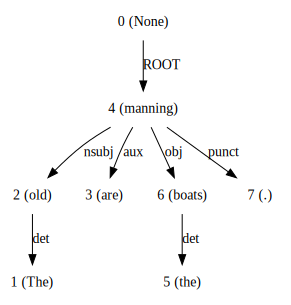

In [10]:
from nltk.parse.corenlp import CoreNLPDependencyParser
my_port = 9001
url = 'http://localhost:'+str(my_port)
parser = CoreNLPDependencyParser(url=url)
parse = next(parser.raw_parse(sentence))
parse

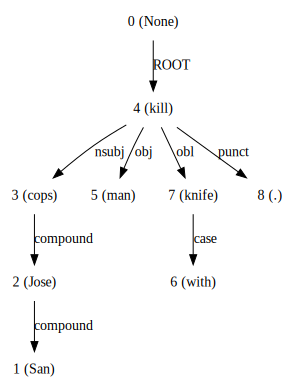

In [11]:
sentence='San Jose cops kill man with knife.'

parse = next(parser.raw_parse(sentence))
parse

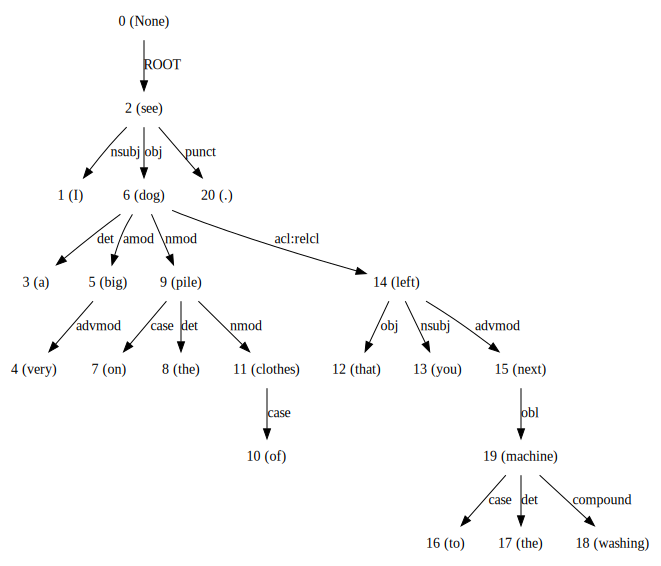

In [12]:
sentence='I see a very big dog on the pile of clothes that you left next to the washing machine.'
parse = next(parser.raw_parse(sentence))
parse

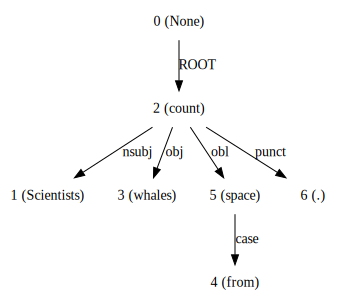

In [13]:
sentence='Scientists count whales from space.'

parse = next(parser.raw_parse(sentence))
parse

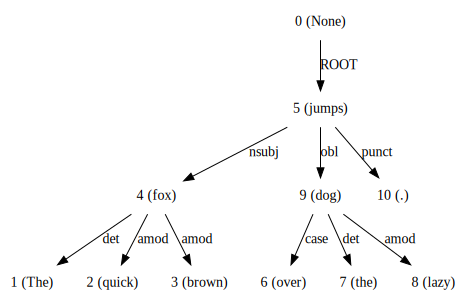

In [14]:
sentence='The quick brown fox jumps over the lazy dog.'

parse = next(parser.raw_parse(sentence))
parse

In [15]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")

def dependency_parsing_to_dataframe(sentence):
    doc = nlp(sentence)
    data = []

    for token in doc:
        data.append({
            'token': token.text,
            'lemma': token.lemma_,
            'pos': token.pos_,
            'tag': token.tag_,
            'dep': token.dep_,
            'head': token.head.text
        })

    df = pd.DataFrame(data)
    return df

sentence = "The quick brown fox jumps over the lazy dog."
df = dependency_parsing_to_dataframe(sentence)
print(df)


   token  lemma    pos  tag    dep   head
0    The    the    DET   DT    det    fox
1  quick  quick    ADJ   JJ   amod    fox
2  brown  brown    ADJ   JJ   amod    fox
3    fox    fox   NOUN   NN  nsubj  jumps
4  jumps   jump   VERB  VBZ   ROOT  jumps
5   over   over    ADP   IN   prep  jumps
6    the    the    DET   DT    det    dog
7   lazy   lazy    ADJ   JJ   amod    dog
8    dog    dog   NOUN   NN   pobj   over
9      .      .  PUNCT    .  punct  jumps


In [17]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

doc = nlp(sentence)

displacy.render(doc, style='dep', jupyter=True)